In [14]:
import requests
import gzip
import json

# URL del archivo JSON comprimido
url = 'https://datarepo.eng.ucsd.edu/mcauley_group/gdrive/goodreads/goodreads_reviews_dedup.json.gz'

# Realizar la solicitud GET al servidor
response = requests.get(url, stream=True)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Descomprimir el contenido del archivo
    with gzip.GzipFile(fileobj=response.raw) as f:
        # Leer las primeras 500 filas del JSON
        primeras_500_filas = [json.loads(next(f)[:-1].decode('utf-8')) for _ in range(50000)]

    # Guardar las primeras 500 filas en un nuevo archivo JSON
    with open('eoo.json', 'w', encoding='utf-8') as file:
        json.dump(primeras_500_filas, file, indent=2)

    print("Las primeras 500 filas del archivo JSON fueron descargadas exitosamente.")
else:
    print(f"Error al descargar el archivo. Código de estado: {response.status_code}")

Las primeras 500 filas del archivo JSON fueron descargadas exitosamente.


In [15]:
import pandas as pd
# Read eoo.json only user_id, book_id, rating
df = pd.read_json('eoo.json')
df = df[['user_id', 'book_id', 'rating']]

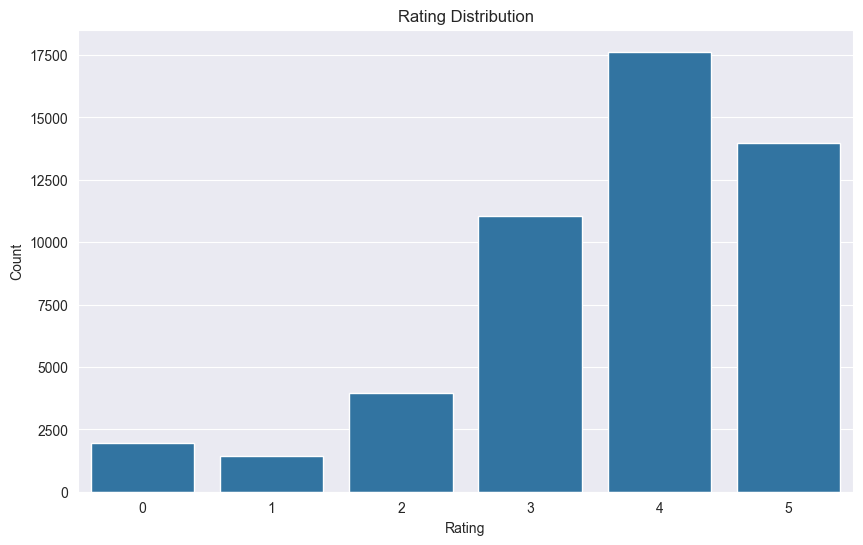

In [16]:
# Plot rating distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

In [18]:
# Give me unique users
unique_users = df['user_id'].unique()

1014


In [ ]:
# Make a database with unique users, list of books rated and list of rating for each book
for user in unique_users:
    # Filter by user
    user_df = df[df['user_id'] == user]
    # Get list of books rated by user
    books = user_df['book_id'].tolist()
    # Get list of ratings for each book
    ratings = user_df['rating'].tolist()
    # Create a dictionary with books and ratings
    user_dict = dict(zip(books, ratings))
    # Save dictionary in a file
    with open(f'users/{user}.json', 'w', encoding='utf-8') as file:
        json.dump(user_dict, file, indent=2)


In [4]:
url='https://datarepo.eng.ucsd.edu/mcauley_group/gdrive/goodreads/goodreads_books.json.gz'

# Realizar la solicitud GET al servidor
response = requests.get(url, stream=True)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Descomprimir el contenido del archivo
    with gzip.GzipFile(fileobj=response.raw) as f:
        # Leer las primeras 500 filas del JSON
        primeras_500_filas = [json.loads(next(f)[:-1].decode('utf-8')) for _ in range(500)]

    # Guardar las primeras 500 filas en un nuevo archivo JSON
    with open('500_llibres.json', 'w', encoding='utf-8') as file:
        json.dump(primeras_500_filas, file, indent=2)

    print("Las primeras 500 filas del archivo JSON fueron descargadas exitosamente.")
else:
    print(f"Error al descargar el archivo. Código de estado: {response.status_code}")

Las primeras 500 filas del archivo JSON fueron descargadas exitosamente.
